In [3]:
#Import packages
from arcgis import GIS
import pandas as pd
from arcgis.features import GeoAccessor 

In [4]:
#Create an authenticated link to our ArcGIS Online account
gis = GIS(url='https://NSOE.maps.arcgis.com',username='jpfay_790')

Enter password: ········


In [34]:
#Read local datasets into spatial dataframes
sdf_Exit = GeoAccessor.from_featureclass('../Data/MJBA/Exits.shp')
sdf_flood = GeoAccessor.from_featureclass('../Data/processed/exits_flood.shp')
sdf_EucDist = GeoAccessor.from_featureclass('../Data/processed/Exits_distance_to_DCFC.shp')
sdf_AmenityCount = GeoAccessor.from_featureclass('../Data/processed/exits_amenities.shp')
sdf_DriveDist = GeoAccessor.from_featureclass('../Data/processed/exits_distances.shp')
sdf_DistToPower = GeoAccessor.from_featureclass('../Data/processed/Exits_distance_to_Power.shp')

In [35]:
#Remove extraneous columns
sdf_Exit = sdf_Exit[['FID','Longitude','Latitude','County','SHAPE']].set_index(['FID'])
sdf_flood = sdf_flood[['FID','Flood_cat']].set_index(['FID'])
sdf_EucDist = sdf_EucDist[['FID','Dist_to_DC']].set_index(['FID'])
sdf_AmenityCount = sdf_AmenityCount[['FID','amenity_n']].set_index(['FID'])
sdf_DriveDist = sdf_DriveDist[['FID','distance']].set_index(['FID'])
sdf_DistToPower = sdf_DistToPower[['FID','Dist_to_Pw']].set_index(['FID'])

In [45]:
#Join all data to master geodataframe
sdf_Master = pd.merge(left=sdf_Exit,right=sdf_flood,how='left',left_index=True,right_index=True)
sdf_Master = pd.merge(left=sdf_Master,right=sdf_EucDist,how='left',left_index=True,right_index=True)
sdf_Master = pd.merge(left=sdf_Master,right=sdf_AmenityCount,how='left',left_index=True,right_index=True)
sdf_Master = pd.merge(left=sdf_Master,right=sdf_DriveDist,how='left',left_index=True,right_index=True)
sdf_Master = pd.merge(left=sdf_Master,right=sdf_DistToPower,how='left',left_index=True,right_index=True)

In [46]:
#Fix Euc dist - change from meters to miles
sdf_Master['Dist_to_DC'] = sdf_Master['Dist_to_DC']/1609.34
sdf_Master.head()

,Longitude,Latitude,County,SHAPE,Flood_cat,Dist_to_DC,amenity_n,distance,Dist_to_Pw
FID,,,,,,,,,
7059,-84.314304,35.019492,Cherokee,"{'x': -84.31430368976345, 'y': 35.019491849669...",Area of Minimal Flood Hazard,103.022794,0,NaN,5.987276
7060,-84.311492,35.014933,Cherokee,"{'x': -84.31149165991212, 'y': 35.014933379571...",Area of Minimal Flood Hazard,102.983699,0,NaN,5.879956
7061,-84.295528,35.013561,Cherokee,"{'x': -84.29552778977563, 'y': 35.013560589649...",Area of Minimal Flood Hazard,102.169982,0,NaN,5.014686
7062,-84.280291,35.012880,Cherokee,"{'x': -84.28029090010494, 'y': 35.012879950349...",Area of Minimal Flood Hazard,101.379188,0,NaN,4.193707
7063,-84.275190,35.017816,Cherokee,"{'x': -84.27519011992803, 'y': 35.017816120417...",Area of Minimal Flood Hazard,100.986949,0,NaN,3.823759


In [47]:
#Save to file
sdf_Master.spatial.to_featureclass('../Data/processed/Final_exits.shp')

'../Data/processed/Final_exits.shp'

In [48]:
#import NREL CSV as dataframe
DCFC_df = pd.read_csv('../Data/NREL/DCFC.csv')

In [52]:
#Convert dataframe to arcgis spatial dataframe
DCFC_sdf = GeoAccessor.from_xy(DCFC_df,x_column='longitude',y_column='latitude',sr=4326)

In [56]:
DCFC_lyr = DCFC_sdf.spatial.to_featurelayer(title="NREL DC Fast Charger Site",
                                    tags="ENV790, EV Charger, NREL")

In [57]:
DCFC_lyr

<Item title:"NREL DC Fast Charger Site" type:Feature Layer Collection owner:jpfay_790>

In [59]:
#Construct the dictionary of feature layer properties
featLayer_properties = {
    'snippet':"NREL DC Fast Charging site. Extracted and subset via the NREL API",
    'summary':"These data were extracted from the NREL API, subset using the following criteria..."
}
#Apply the changes
DCFC_lyr.update(featLayer_properties)

True

<Item title:"NREL DC Fast Charger Site" type:Feature Layer Collection owner:jpfay_790>
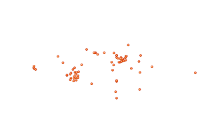

In [60]:
DCFC_lyr

In [61]:
DCFC_lyr.share(org=True)

{'results': [{'itemId': '1c50afb96d3e4c1cb349a27f2f2c1a5e',
   'success': True,
   'notSharedWith': []}]}

In [62]:
lyr_master = sdf_Master.spatial.to_featurelayer(title="Candidate Charger Sites",
                                    tags="ENV790, EV Charger, NREL")